In [5]:
mp_root = '/media/lsky/HDD/MP'

In [24]:
images_root = '../img/'

In [6]:
import os
import numpy as np

In [27]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [7]:
nnd = np.load(os.path.join(mp_root, 'meta_derived', 'closest_neighbor_distances.npy'), allow_pickle=True)
spacing = np.array([max(distances_list) for distances_list in nnd])

In [9]:
inner_radii = np.load(os.path.join(mp_root, 'meta_derived', 'inner_radii.npy'))
outer_radii = np.load(os.path.join(mp_root, 'meta_derived', 'outer_radii.npy'))

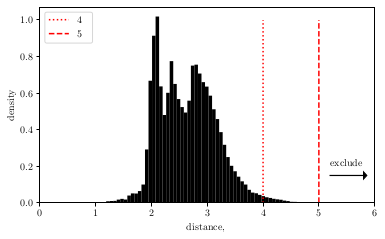

In [101]:
plt.figure(figsize=(6, 3.6))
plt.hist(spacing, bins=200, density=True, color='black')
plt.xlabel("distance, Å")
plt.ylabel("density")
plt.vlines(4, 0, 1.0, linestyle="dotted", color='red', label="4 Å     ")
plt.vlines(5, 0, 1.0, linestyle="dashed", color='red', label="5 Å     ")
plt.legend(loc="upper left", fontsize="medium")
plt.xlim((0,6))
plt.text(5.2, 0.2, 'exclude')
plt.arrow(5.2, 0.15, 0.6, 0, head_width=0.04, color='black')
plt.savefig(f'{images_root}/closest_neighbor_distribution.pgf');

In [52]:
max(spacing)

13.400094481335495

In [106]:
spacing[spacing>6].__len__()

174

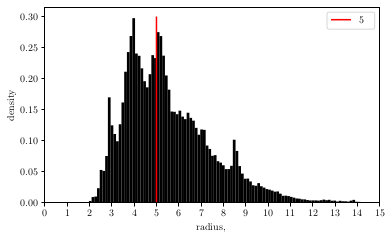

In [43]:
plt.figure(figsize=(6, 3.6))
plt.xlabel("radius, Å")
plt.ylabel("density")
plt.hist(inner_radii, bins=200, density=True, color='black')
plt.vlines(5, 0, 0.3, color='red', label="5 Å     ")
plt.xlim((0,15))
plt.xticks(np.arange(15+1))
plt.legend()
plt.savefig(f'{images_root}/inner_radius.pgf');

In [49]:
max(inner_radii)

24.72814241

In [107]:
inner_radii[inner_radii>15].__len__()

107

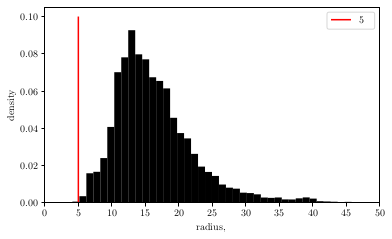

In [48]:
plt.figure(figsize=(6, 3.6))
plt.xlabel("radius, Å")
plt.ylabel("density")
plt.hist(outer_radii, bins=200, density=True, color='black')
plt.vlines(5, 0, 0.1, color='red', label="5 Å     ")
plt.xlim((0,50))
plt.xticks(np.arange(0, 51, 5))
plt.legend()
plt.savefig(f'{images_root}/outer_radius.pgf');

In [50]:
max(outer_radii)

211.55942077853473

In [109]:
outer_radii[outer_radii>50].__len__()

718

In [56]:
from collections import Counter

In [57]:
diameters = np.load(os.path.join(mp_root, 'meta_derived', 'diameters_5.0.npy'))

In [69]:
diameters_dict = dict(sorted(Counter(diameters).items()))
diameters_unique = np.array(list(diameters_dict.keys()))
diameters_counts = np.array(list(diameters_dict.values()))

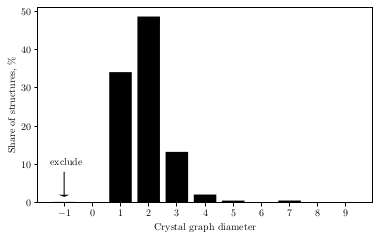

In [105]:
plt.figure(figsize=(6, 3.6))
plt.bar(diameters_unique[:10], diameters_counts[:10]*100/diameters_counts.sum(), color="black")
plt.bar(diameters_unique[0], diameters_counts[0]*100/diameters_counts.sum(), color="red")
plt.ylabel("Share of structures, %")
plt.xlabel("Crystal graph diameter")
plt.xticks(np.arange(-1, 9+1))
plt.text(-1.5, 10, 'exclude')
plt.arrow(-1, 8, 0, -6, head_width=0.2, color='black')
plt.savefig(f'{images_root}/diameters.pgf');

In [117]:
diameters_counts[1:5].sum()/diameters_counts.sum()

0.9816053235580654

In [116]:
diameters_unique[1:5]

array([1, 2, 3, 4])